In [1]:
import numpy as np
import matplotlib.pyplot as plt
# resistivity regularization parameter selection

In [2]:
import os
import re

path = './log' # the files in log are generated by the script "/individual_inv/change_reg_res.sh"
files = os.listdir(path)
print(files)

['20.out', '1000.out', '100.out', '50.out', '10.out', '5.out', '500.out']


In [3]:
result = []
out_files = []
for file in files:
    if file.endswith('.out'):
        with open(os.path.join(path, file), 'r') as f:
            lines = f.readlines()
            if len(lines) >= 601:
                line = lines[600] # select the 600th iteration
                print(line)
                result.append(line.split())
        out_files.append(file)
print(result)

  600         5212.95         3659.73         77.6606  1239

  600         18305.4         13257.6         5.04786  1293

  600          8709.7         6092.84         26.1686  1301

  600         7080.07         5112.74         39.3465  1293

  600          4082.9         2684.89         139.801  1241

  600         3318.75         2096.85         244.381  1239

  600         14683.3         10469.1         8.42857  1287

[['600', '5212.95', '3659.73', '77.6606', '1239'], ['600', '18305.4', '13257.6', '5.04786', '1293'], ['600', '8709.7', '6092.84', '26.1686', '1301'], ['600', '7080.07', '5112.74', '39.3465', '1293'], ['600', '4082.9', '2684.89', '139.801', '1241'], ['600', '3318.75', '2096.85', '244.381', '1239'], ['600', '14683.3', '10469.1', '8.42857', '1287']]


In [4]:
model_misfit = []
data_misfit = []
for iter in result:
    model_misfit.append(np.double(iter[3]))
    data_misfit.append(np.double(iter[2]))

print(model_misfit, '\n', data_misfit)

[77.6606, 5.04786, 26.1686, 39.3465, 139.801, 244.381, 8.42857] 
 [3659.73, 13257.6, 6092.84, 5112.74, 2684.89, 2096.85, 10469.1]


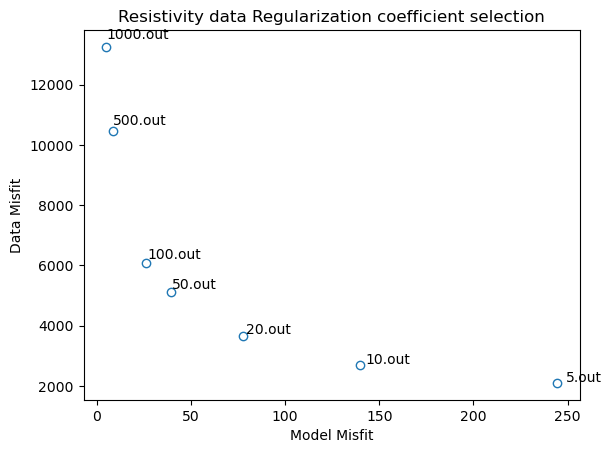

In [5]:
plt.figure()
plt.plot(model_misfit, data_misfit, marker='o', markerfacecolor='none', linestyle='none')
plt.xlabel('Model Misfit')
plt.ylabel('Data Misfit')
plt.title('Resistivity data Regularization coefficient selection')
tmp_iter = 0
for i,j in zip(model_misfit,data_misfit):
    plt.text(i*1.02,j*1.02,out_files[tmp_iter])
    tmp_iter = tmp_iter + 1
plt.show()